# Bias Variance Trade Off 
This notebook aims to help gain a better understanding of bias variance trade off by defining a function to compute the bias and variance of a neural network model and plotting how the bias and variance changes with increasing capacity (with more hidden units)

### Import 
Import the libraries needed to define the neural network model and the function to compute the bias and variance of the model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define True Function

In [2]:
def true_function(x):
    y = np.exp(np.sin(x*(2*3.1413)))
    return y

### Define Function to Compute Data Points (with/without noise)
Define a function that takes in an input value and uses the true function to compute the output. However, the function then offsets the true output value by a slight variance (noise). This is the definition of variance, or the variation in the model's predictions from small changes to the training dataset.

In [3]:
def generate_data(n_data, sigma_y=0.3):
    # Generate x values from [0, 1]
    x = np.ones(n_data)
    for i in range(n_data):
        x[i] = np.random.uniform(i/n_data, (i+1)/n_data, 1)

    # Evaluate the output value using the model function
    # Add noise to the output values
    y = np.ones(n_data)
    for i in range(n_data):
        y[i] = true_function(x[i])
        y[i] += np.random.normal(0, sigma_y, 1)
    return x,y

### Define Plotting Function 
Define a function to plot both the true function and the fitted function (the output of the neural network model)

In [4]:
def plot_function(x_func, y_func, x_data=None,y_data=None, x_model = None, y_model =None, sigma_func = None, sigma_model=None):

    fig,ax = plt.subplots()
    ax.plot(x_func, y_func, 'k-')
    if sigma_func is not None:
      ax.fill_between(x_func, y_func-2*sigma_func, y_func+2*sigma_func, color='lightgray')

    if x_data is not None:
        ax.plot(x_data, y_data, 'o', color='#d18362')

    if x_model is not None:
        ax.plot(x_model, y_model, '-', color='#7fe7de')

    if sigma_model is not None:
      ax.fill_between(x_model, y_model-2*sigma_model, y_model+2*sigma_model, color='lightgray')

    ax.set_xlim(0,1)
    ax.set_xlabel('Input, x')
    ax.set_ylabel('Output, y')
    plt.show()

### Compute True Function

In [5]:
x_func = np.linspace(0, 1.0, 100)
y_func = true_function(x_func)

### Compute True Function with Noise
Compute the true function but add a variance to the generated output value

In [6]:
np.random.seed(1)
sigma_func = 0.3
n_data = 15
x_data,y_data = generate_data(n_data, sigma_func)

/var/folders/hd/f_gk36z51lj__phqtmgrmv8w0000gn/T/ipykernel_38366/1059800328.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = np.random.uniform(i/n_data, (i+1)/n_data, 1)
/var/folders/hd/f_gk36z51lj__phqtmgrmv8w0000gn/T/ipykernel_38366/1059800328.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] += np.random.normal(0, sigma_y, 1)


### Plot True Function and True Function with Noise

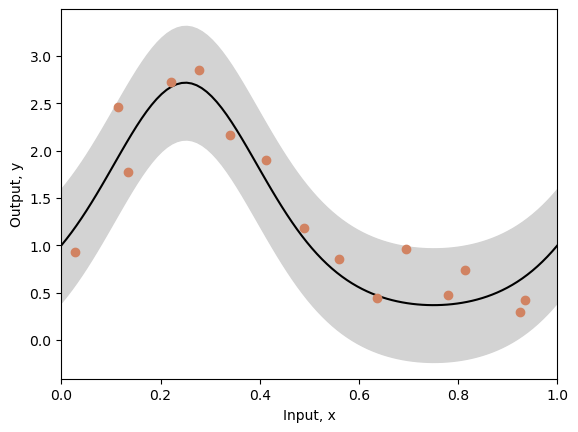

In [7]:
plot_function(x_func, y_func, x_data, y_data, sigma_func=sigma_func)

### Define Neural Network Model (One Hidden Layer)

In [8]:
def network(x, beta, omega):
    # Retrieve number of hidden units
    n_hidden = omega.shape[0]

    y = np.zeros_like(x)
    for c_hidden in range(n_hidden):
        # Evaluate activations for each joint
        line_vals =  x  - c_hidden/n_hidden
        h =  line_vals * (line_vals > 0)
        # Weight activations by omega parameters and sum
        y = y + omega[c_hidden] * h
    # Add bias (beta) and compute output
    y = y + beta

    return y

### Define Minimizing Parameter Function
Define a function that computes the parameters that minimizes the loss function

In [9]:
def fit_model_closed_form(x,y,n_hidden):
  n_data = len(x)
  A = np.ones((n_data, n_hidden+1))
  for i in range(n_data):
      for j in range(1,n_hidden+1):
          A[i,j] = x[i]-(j-1)/n_hidden
          if A[i,j] < 0:
              A[i,j] = 0

  beta_omega = np.linalg.lstsq(A, y, rcond=None)[0]

  beta = beta_omega[0]
  omega = beta_omega[1:]

  return beta, omega

### Compute Best Parameters 
Compute the best parameters (parameters that minimizes the loss function)

In [10]:
beta, omega = fit_model_closed_form(x_data,y_data,n_hidden=3)

### Compute Neural Network Model
Compute the neural network model using the defined parameters above

In [11]:
x_model = np.linspace(0,1,100)
y_model = network(x_model, beta, omega)

### Plot True and Neural Network Model Function

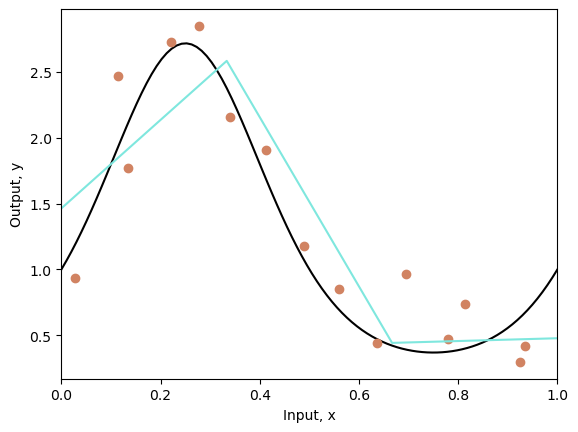

In [12]:
plot_function(x_func, y_func, x_data,y_data, x_model, y_model)

## Compute a Neural Network Model's Mean Curve and its Variance across the entire dataset

### Define Function to Compute Mean and Variance 
Given a neural network, define a function that computes the mean and variance of the neural network for each input value

In [13]:
def get_model_mean_variance(n_data, n_datasets, n_hidden, sigma_func):

  # Create array that stores model results in rows
  y_model_all = np.zeros((n_datasets, x_model.shape[0]))

  for c_dataset in range(n_datasets):
    # Generate n_data x,y, pairs with variance
    x_data,y_data = generate_data(n_data, sigma_func)

    # Compute the best parameters
    beta, omega = fit_model_closed_form(x_data,y_data,n_hidden)

    # Compute the neural network using the best parameters
    y_model = network(x_model, beta, omega)

    # Store the model results
    y_model_all[c_dataset,:] = y_model

  # Compute mean and standard deviation of model
  mean_model = np.mean(y_model_all,axis=0)
  std_model = np.std(y_model_all,axis=0)

  # Return the mean and standard deviation of the fitted model
  return mean_model, std_model

### Define Parameters
Define parameters for the neural network model

In [14]:
n_datasets = 100
n_data = 15
sigma_func = 0.3
n_hidden = 5

### Compute Mean and Variance
Using the neural network model defined by the above parameters, compute the mean and variance of the model for each input value. Store the mean curve of the neural network model and its standard deviations in its respective variables.

In [15]:
np.random.seed(1)
mean_model, std_model = get_model_mean_variance(n_data, n_datasets, n_hidden, sigma_func) 

/var/folders/hd/f_gk36z51lj__phqtmgrmv8w0000gn/T/ipykernel_38366/1059800328.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = np.random.uniform(i/n_data, (i+1)/n_data, 1)
/var/folders/hd/f_gk36z51lj__phqtmgrmv8w0000gn/T/ipykernel_38366/1059800328.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] += np.random.normal(0, sigma_y, 1)


### Plot Neural Network Model and Mean Curve of the Neural Network Model with Variance

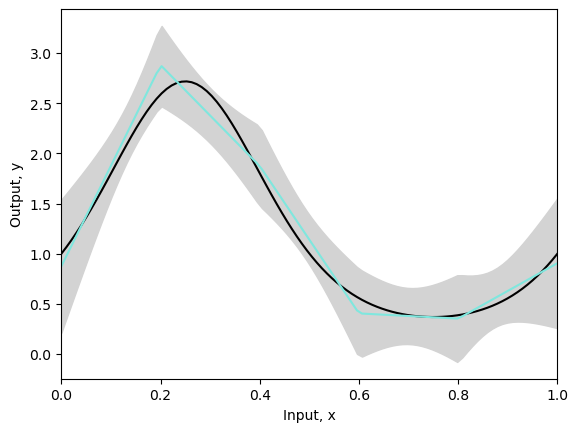

In [16]:
plot_function(x_func, y_func, x_model=x_model, y_model=mean_model, sigma_model=std_model)

## Compute Bias and Variance of a Neural Network Model as a Function of Capacity (# of Hidden Units)

### Define Hidden Units 
Define a list of hidden units with increasing number

In [17]:
n_hidden = 12
hidden_variables = list(range(1, n_hidden + 1))

### Define Array Structure (Bias and Variance)
Define an array structure to store the value of the computed bias and variance

In [18]:
bias = np.zeros((len(hidden_variables),1)) 
variance = np.zeros((len(hidden_variables),1)) 

### Define Parameters
Define parameters for the neural network model

In [19]:
n_datasets = 100
n_data = 15
sigma_func = 0.3
n_hidden = 5
np.random.seed(1)

### Compute Variance and Bias 
For each number of hidden units, compute the variance and the bias of the neural network model across the entire dataset

In [20]:
for c_hidden in range(len(hidden_variables)):
  # Compute the mean and variance of fitted model
  mean_model, std_model = get_model_mean_variance(n_data, n_datasets, hidden_variables[c_hidden], sigma_func) 
  # Compute variance (average squared deviation of fitted models around mean fitted model)
  variance[c_hidden] = np.mean(std_model**2)
  # Compute bias (average squared deviation of mean fitted model around true function)
  bias[c_hidden] = np.mean((mean_model - true_function(x_model))**2)

/var/folders/hd/f_gk36z51lj__phqtmgrmv8w0000gn/T/ipykernel_38366/1059800328.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = np.random.uniform(i/n_data, (i+1)/n_data, 1)
/var/folders/hd/f_gk36z51lj__phqtmgrmv8w0000gn/T/ipykernel_38366/1059800328.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] += np.random.normal(0, sigma_y, 1)


### Plot Results
Plot a variance, bias, and bias+variance graph as a function of the model's capacity (number of hidden units)

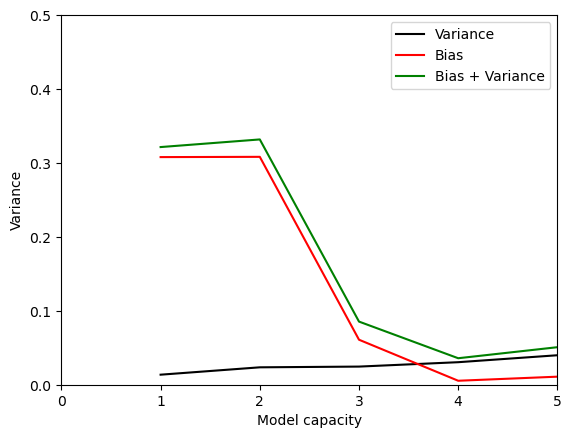

In [21]:
fig,ax = plt.subplots()
ax.plot(hidden_variables, variance, 'k-')
ax.plot(hidden_variables, bias, 'r-')
ax.plot(hidden_variables, variance+bias, 'g-')
ax.set_xlim(0,n_hidden)
ax.set_ylim(0,0.5)
ax.set_xlabel("Model capacity")
ax.set_ylabel("Variance")
ax.legend(['Variance', 'Bias', 'Bias + Variance'])
plt.show()